In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot


# 1. load urban/rural data

In [8]:
df= pd.read_csv('census_zipcode/urban_rural_zipcode.csv')

df_zip= pd.read_csv('zipcode_filtered_test.csv')


all_zipcodes = df_zip['Zipcode'].unique()
print(all_zipcodes[0] in df['Zipcode'])
urban=[]


for  zipcode in all_zipcodes:
    
    temp_df= df[df['Zipcode']==zipcode]
    if len(temp_df)>0:
        if temp_df['Urban'].values[0]: 
            urban+=['Urban']
        else:
            urban+=['Rural']
    else:
        urban+=[np.nan]
    

print(urban)

FileNotFoundError: [Errno 2] No such file or directory: 'zipcode_filtered_test.csv'

# 2. convert zipcode boundaries to shapefile

In [ ]:
# processing of raw data only has to be done once

# master_data = gpd.read_file('tl_2016_us_zcta510/tl_2016_us_zcta510.shp')
# master_data.head()

# zipcode_filtered= master_data[master_data['ZCTA5CE10'].astype(int).isin(all_zipcodes)]
# zipcode_filtered.to_file('zipcode_polygon.shp')

In [ ]:
master_data = gpd.read_file('zipcode_polygon.shp')

# 3. combine 1. and 2. into a dataframe

In [ ]:
master_data['Urban']=np.nan

zip_dict = {all_zipcodes[i]:urban[i] for i in range(len(urban))}

for i in range(len(master_data)):
    master_data.loc[i, 'Urban']= zip_dict[int(master_data.loc[i,'ZCTA5CE10'])]
    
    

In [4]:
master_data.head()

NameError: name 'master_data' is not defined

# 4. plot background

In [5]:
central_valley_image= rasterio.open('Central_Valley.tif')
print(central_valley_image.crs)


EPSG:4326


NameError: name 'master_data' is not defined

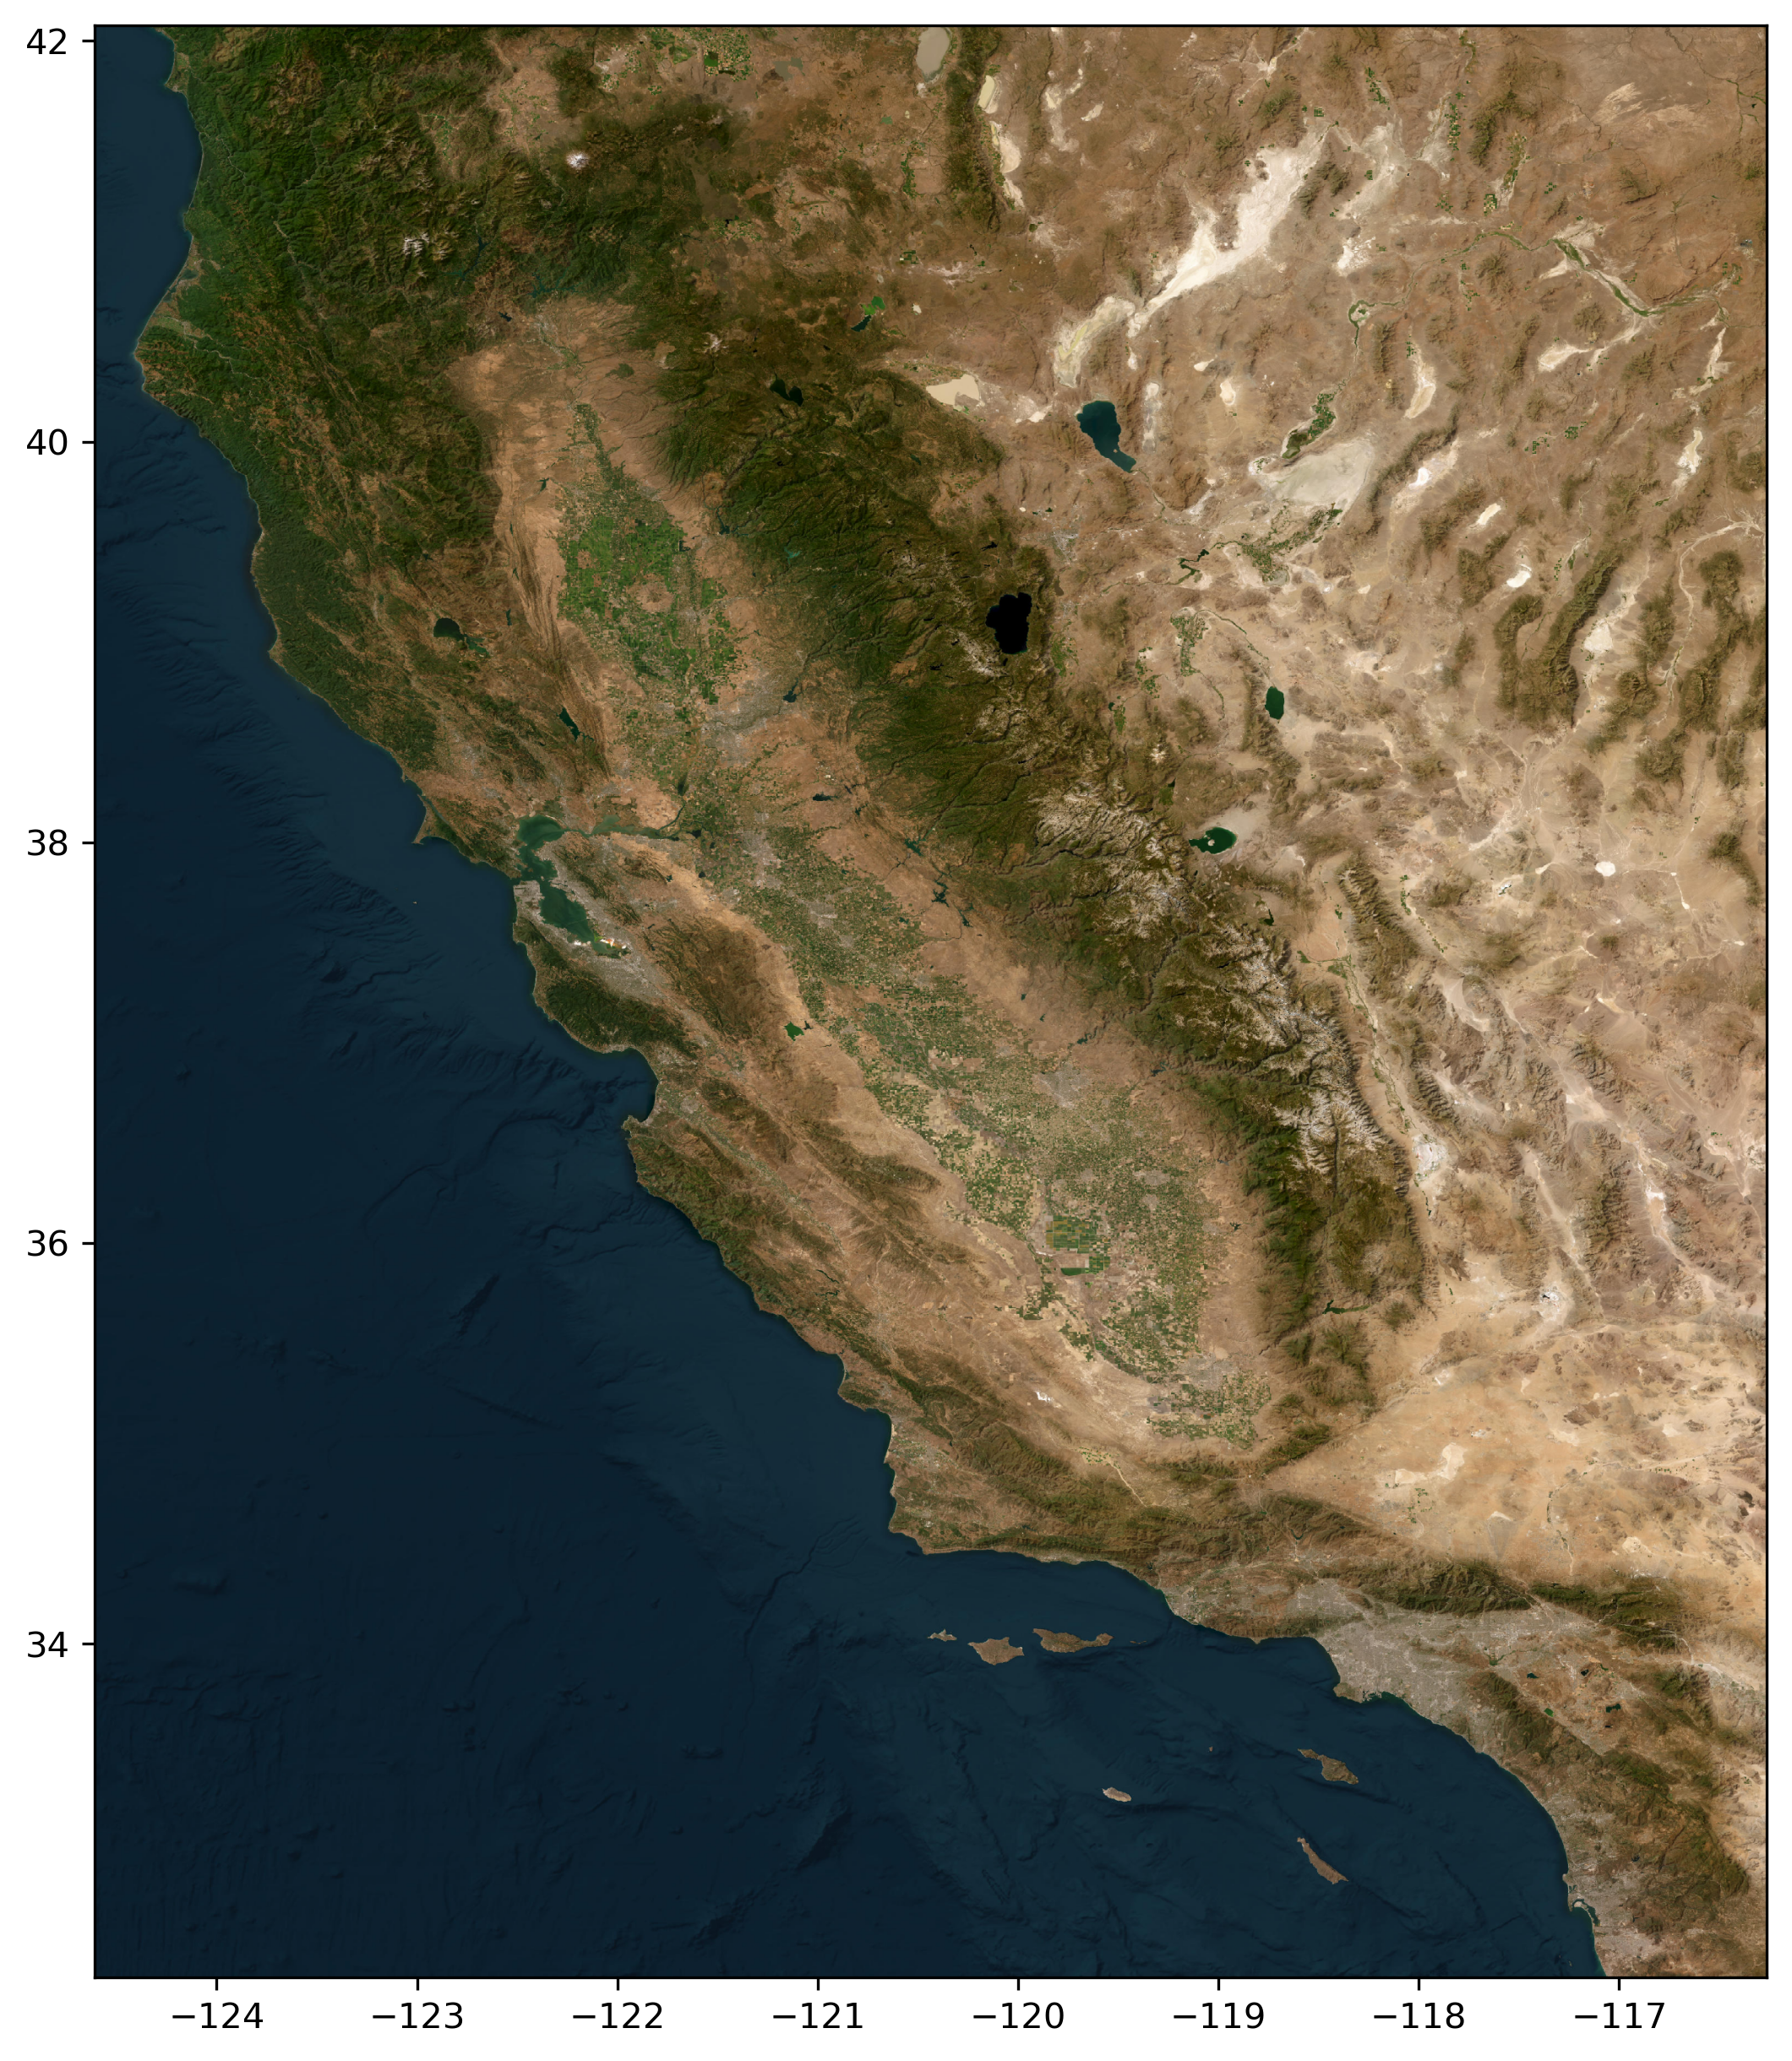

In [6]:


fig, ax=plt.subplots(figsize=(10,10), dpi= 300)
rasterio.plot.show(central_valley_image.read(), ax= ax,transform = central_valley_image.transform)
master_data.plot('Urban', cmap='bwr', legend= True, ax=ax, alpha =0.5, edgecolor='black')                                                 
plt.xlim(-123,-117)
plt.ylim(34,40)



# 5. plot zipcodes

In [ ]:
master_data.plot('Total_unique_years', cmap='Reds', legend= True, ax=ax)